In [1]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode
from planning import a_star_search, uniform_cost_search, apply, random_search, ALLOWED_COMPOSITE_MOVES
import gym
import numpy as np

In [10]:
width = 5
height = 5
n_golds = 4
n_leps = 0
max_steps = 100

env1 = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=width, height=height,
    n_leps=n_leps,
    n_golds=n_golds,
    max_episode_steps=max_steps,
    gold_score=100,
    stair_score=0,
    time_penalty=-1
    )

plan1, n_expanded1 = a_star_search(env=env1)
print('PLAN 1')
print(f'Starting position: {env1.agent_coord}, Stair position: {env1.stair_coord}')
print(f'Gold positions: {env1.gold_coords}')
print(f'Expanded nodes: {n_expanded1}')
plan1.show()

env2 = env1.copy()

print('\nPLAN 2')
plan2, n_expanded2 = a_star_search(
    env=env2,
    allowed_moves_function=ALLOWED_COMPOSITE_MOVES
    )
print(f'Starting position: {env2.agent_coord}, Stair position: {env2.stair_coord}')
print(f'Gold positions: {env2.gold_coords}')
print(f'Expanded nodes: {n_expanded2}')
plan2.show()


env3 = env1.copy()

print('\nPLAN 3')
plan3, n_expanded3 = uniform_cost_search(env=env3)
print(f'Starting position: {env3.agent_coord}, Stair position: {env3.stair_coord}')
print(f'Gold positions: {env3.gold_coords}')
print(f'Expanded nodes: {n_expanded3}')
plan3.show()

env4 = env1.copy()

print('\nPLAN 4')
plan4, n_expanded4 = uniform_cost_search(
    env=env4,
    allowed_moves_function=ALLOWED_COMPOSITE_MOVES
    )
print(f'Starting position: {env4.agent_coord}, Stair position: {env4.stair_coord}')
print(f'Gold positions: {env4.gold_coords}')
print(f'Expanded nodes: {n_expanded4}')
plan4.show()

PLAN 1
Starting position: (1, 3), Stair position: (2, 3)
Gold positions: [(1, 4), (3, 4), (3, 1), (1, 0)]
Expanded nodes: 211
Path: [(1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (3, 1), (2, 0), (1, 0), (1, 1), (1, 2), (2, 3)]
Actions: ['N', 'E', 'E', 'S', 'S', 'S', 'SW', 'W', 'N', 'N', 'NE']

PLAN 2
Starting position: (1, 3), Stair position: (2, 3)
Gold positions: [(1, 4), (3, 4), (3, 1), (1, 0)]
Expanded nodes: 265
Path: [(1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (3, 1), (2, 1), (1, 0), (1, 1), (1, 2), (2, 3)]
Actions: ['N', 'E', 'E', 'S', 'S', 'S', 'W', 'SW', 'N', 'N', 'NE']

PLAN 3
Starting position: (1, 3), Stair position: (2, 3)
Gold positions: [(1, 4), (3, 4), (3, 1), (1, 0)]
Expanded nodes: 10
Path: [(1, 3), (1, 4), (2, 4), (3, 4), (2, 3)]
Actions: ['N', 'E', 'E', 'SW']

PLAN 4
Starting position: (1, 3), Stair position: (2, 3)
Gold positions: [(1, 4), (3, 4), (3, 1), (1, 0)]
Expanded nodes: 53
Path: [(1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (3, 1), (2, 1), (1, 0)

In [11]:
states1, rewards1, done1 = apply(env1, plan1)
states2, rewards2, done2 = apply(env2, plan2)
states3, rewards3, done3 = apply(env3, plan3)
states4, rewards4, done4 = apply(env4, plan4)

rewards1_round = []
for r in rewards1:
    rewards1_round.append(round(r, 2))

rewards2_round = []
for r in rewards2:
    rewards2_round.append(round(r, 2))

rewards3_round = []
for r in rewards3:
    rewards3_round.append(round(r, 2))

rewards4_round = []
for r in rewards4:
    rewards4_round.append(round(r, 2))

print(f'Rewards1: {rewards1_round}, sum: {np.sum(rewards1_round)}')
print(f'Rewards2: {rewards2_round}, sum: {np.sum(rewards2_round)}')
print(f'Rewards3: {rewards1_round}, sum: {np.sum(rewards3_round)}')
print(f'Rewards4: {rewards2_round}, sum: {np.sum(rewards4_round)}')

Rewards1: [0, 99.0, -1.0, 99.0, -1.0, -1.0, 99.0, -1.41, 99.0, -1.0, -1.0, -1.41], sum: 388.18
Rewards2: [0, 99.0, -1.0, 99.0, -1.0, -1.0, 99.0, -1.0, 98.59, -1.0, -1.0, -1.41], sum: 388.18
Rewards3: [0, 99.0, -1.0, 99.0, -1.0, -1.0, 99.0, -1.41, 99.0, -1.0, -1.0, -1.41], sum: 195.59
Rewards4: [0, 99.0, -1.0, 99.0, -1.0, -1.0, 99.0, -1.0, 98.59, -1.0, -1.0, -1.41], sum: 388.18


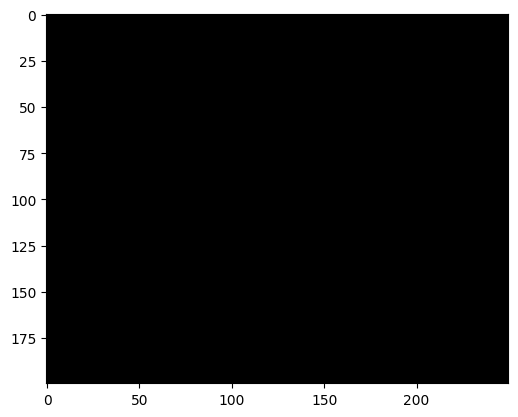

In [14]:
show_episode(states3, clear_output=True)

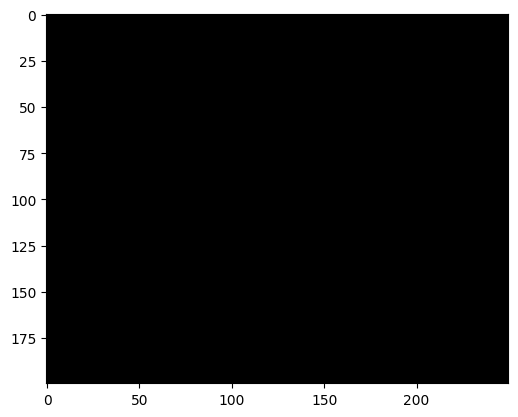

In [6]:
show_episode(states2, clear_output=True)

In [11]:
width = 5
height = 5
n_golds = 4
n_leps = 0
max_steps = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=width, height=height,
    n_leps=n_leps,
    n_golds=n_golds,
    max_episode_steps=max_steps,
    gold_score=100,
    stair_score=1,
    time_penalty=-1
    )

plan1, n_expanded1 = uniform_cost_search(env=env)
print('PLAN 1')
print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}')
print(f'Expanded nodes: {n_expanded1}')
plan1.show()

env_copy = env.copy()

print('\nPLAN 2')
plan2, n_expanded2 = uniform_cost_search(
    env=env_copy,
    allowed_moves_function=ALLOWED_COMPOSITE_MOVES
    )
print(f'Starting position: {env_copy.agent_coord}, Stair position: {env_copy.stair_coord}')
print(f'Gold positions: {env_copy.gold_coords}')
print(f'Expanded nodes: {n_expanded2}')
plan2.show()

PLAN 1
Starting position: (1, 3), Stair position: (3, 2)
Gold positions: [(3, 4), (0, 1), (0, 0), (2, 0)]
Expanded nodes: 146
Path: [(1, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 3), (3, 4), (3, 3), (3, 2)]
Actions: ['SW', 'S', 'S', 'E', 'E', 'N', 'N', 'NE', 'N', 'S', 'S']

PLAN 2
Starting position: (1, 3), Stair position: (3, 2)
Gold positions: [(3, 4), (0, 1), (0, 0), (2, 0)]
Expanded nodes: 201
Path: [(1, 3), (1, 2), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 3), (3, 4), (3, 3), (3, 2)]
Actions: ['S', 'SW', 'S', 'E', 'E', 'N', 'N', 'NE', 'N', 'S', 'S']


In [12]:
states1, rewards1, done1 = apply(env, plan1)
states2, rewards2, done2 = apply(env_copy, plan2)

rewards1_round = []
for r in rewards1:
    rewards1_round.append(round(r, 2))

rewards2_round = []
for r in rewards2:
    rewards2_round.append(round(r, 2))

print(f'Rewards1: {rewards1_round}, sum: {np.sum(rewards1_round)}')

print(f'Rewards2: {rewards2_round}, sum: {np.sum(rewards2_round)}')

Rewards1: [0, -1.41, 99.0, 99.0, -1.0, 99.0, -1.0, -1.0, -1.41, 99.0, -1.0, 0.0], sum: 389.18
Rewards2: [0, -1.0, 98.59, 99.0, -1.0, 99.0, -1.0, -1.0, -1.41, 99.0, -1.0, 0.0], sum: 389.18


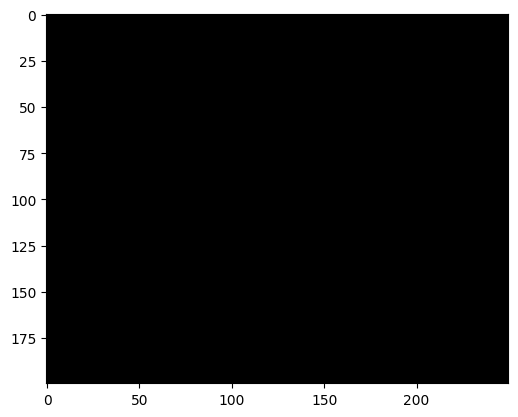

In [13]:
show_episode(states1, clear_output=True)

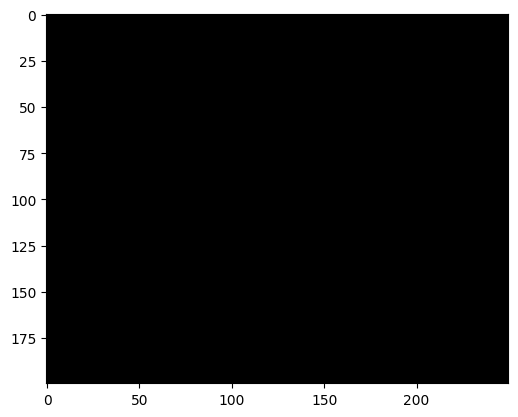

In [14]:
show_episode(states2, clear_output=True)